In [0]:
!wget "https://github.com/utkuozbulak/pytorch-cnn-visualizations/blob/master/input_images/dd_tree.jpg"

--2019-11-05 17:22:45--  https://github.com/utkuozbulak/pytorch-cnn-visualizations/blob/master/input_images/dd_tree.jpg
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dd_tree.jpg.1’

dd_tree.jpg.1           [ <=>                ]  65.40K  --.-KB/s    in 0.009s  

2019-11-05 17:22:45 (7.17 MB/s) - ‘dd_tree.jpg.1’ saved [66973]



In [0]:
import cv2

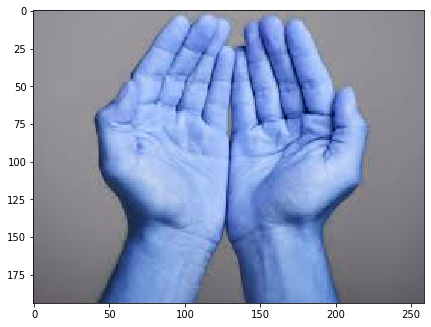

In [0]:
image = cv2.imread("/content/hand.jpg")
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image)

In [0]:
import os
import copy
import numpy as np
from PIL import Image

import torch
from torch.optim import Adam
from torchvision import models
import matplotlib.pyplot as plt


def save_image(im, path):
    """
        Saves a numpy matrix or PIL image as an image
    Args:
        im_as_arr (Numpy array): Matrix of shape DxWxH
        path (str): Path to the image
    """
    if isinstance(im, (np.ndarray, np.generic)):
        #im = format_np_output(im)
        im = Image.fromarray(im)
    im.save(path)


def preprocess_image(pil_im, resize_im=True):
    """
        Processes image for CNNs
    Args:
        PIL_img (PIL_img): Image to process
        resize_im (bool): Resize to 224 or not
    returns:
        im_as_var (torch variable): Variable that contains processed float tensor
    """
    # mean and std list for channels (Imagenet)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    # Resize image
    if resize_im:
        pil_im.thumbnail((512, 512))
    im_as_arr = np.float32(pil_im)
    im_as_arr = im_as_arr.transpose(2, 0, 1)  # Convert array to D,W,H
    # Normalize the channels
    for channel, _ in enumerate(im_as_arr):
        im_as_arr[channel] /= 255
        im_as_arr[channel] -= mean[channel]
        im_as_arr[channel] /= std[channel]
    # Convert to float tensor

    image_tensor = torch.from_numpy(im_as_arr).float()
    image_tensor.unsqueeze_(0)
    image_tensor = torch.zeros_like(image_tensor)
    image_tensor.requires_grad = True

    return image_tensor
    

def recreate_image(im_as_var):
    """
        Recreates images from a torch variable, sort of reverse preprocessing
    Args:
        im_as_var (torch variable): Image to recreate
    returns:
        recreated_im (numpy arr): Recreated image in array
    """
    reverse_mean = [-0.485, -0.456, -0.406]
    reverse_std = [1/0.229, 1/0.224, 1/0.225]
    recreated_im = copy.copy(im_as_var.data.numpy()[0])
    for c in range(3):
        recreated_im[c] /= reverse_std[c]
        recreated_im[c] -= reverse_mean[c]
    recreated_im[recreated_im > 1] = 1
    recreated_im[recreated_im < 0] = 0
    recreated_im = np.round(recreated_im * 255)

    recreated_im = np.uint8(recreated_im).transpose(1, 2, 0)
    return recreated_im

Iteration: 1 Loss: 0.75
Iteration: 2 Loss: 0.78
Iteration: 3 Loss: 0.18
Iteration: 4 Loss: -0.55
Iteration: 5 Loss: -1.54
Iteration: 6 Loss: -2.35
Iteration: 7 Loss: -3.35
Iteration: 8 Loss: -4.30
Iteration: 9 Loss: -5.29
Iteration: 10 Loss: -6.30
Iteration: 11 Loss: -7.39
Iteration: 12 Loss: -8.47
Iteration: 13 Loss: -9.49
Iteration: 14 Loss: -10.53
Iteration: 15 Loss: -11.58
Iteration: 16 Loss: -12.60
Iteration: 17 Loss: -13.57
Iteration: 18 Loss: -14.52
Iteration: 19 Loss: -15.43
Iteration: 20 Loss: -16.35


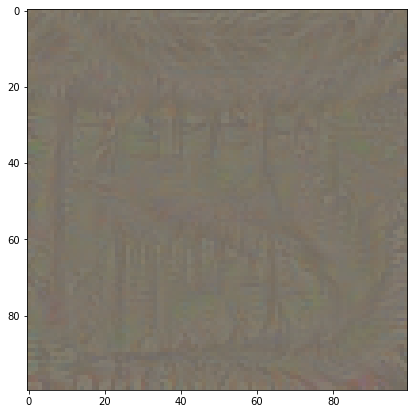

Iteration: 21 Loss: -17.28
Iteration: 22 Loss: -18.14
Iteration: 23 Loss: -19.01
Iteration: 24 Loss: -19.90
Iteration: 25 Loss: -20.74
Iteration: 26 Loss: -21.58
Iteration: 27 Loss: -22.45
Iteration: 28 Loss: -23.31
Iteration: 29 Loss: -24.11
Iteration: 30 Loss: -24.93
Iteration: 31 Loss: -25.74
Iteration: 32 Loss: -26.55
Iteration: 33 Loss: -27.37
Iteration: 34 Loss: -28.18
Iteration: 35 Loss: -28.97
Iteration: 36 Loss: -29.77
Iteration: 37 Loss: -30.57
Iteration: 38 Loss: -31.37
Iteration: 39 Loss: -32.19
Iteration: 40 Loss: -32.98


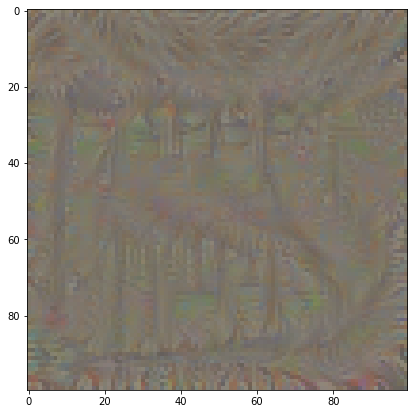

Iteration: 41 Loss: -33.75
Iteration: 42 Loss: -34.52
Iteration: 43 Loss: -35.28
Iteration: 44 Loss: -36.02
Iteration: 45 Loss: -36.77
Iteration: 46 Loss: -37.51
Iteration: 47 Loss: -38.25
Iteration: 48 Loss: -39.01
Iteration: 49 Loss: -39.74
Iteration: 50 Loss: -40.47
Iteration: 51 Loss: -41.19
Iteration: 52 Loss: -41.91
Iteration: 53 Loss: -42.60
Iteration: 54 Loss: -43.28
Iteration: 55 Loss: -43.95
Iteration: 56 Loss: -44.62
Iteration: 57 Loss: -45.30
Iteration: 58 Loss: -45.97
Iteration: 59 Loss: -46.63
Iteration: 60 Loss: -47.28


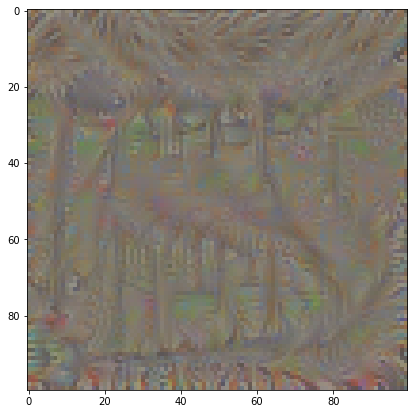

Iteration: 61 Loss: -47.94
Iteration: 62 Loss: -48.59
Iteration: 63 Loss: -49.22
Iteration: 64 Loss: -49.85
Iteration: 65 Loss: -50.46
Iteration: 66 Loss: -51.06
Iteration: 67 Loss: -51.67
Iteration: 68 Loss: -52.25
Iteration: 69 Loss: -52.85
Iteration: 70 Loss: -53.42
Iteration: 71 Loss: -54.00
Iteration: 72 Loss: -54.58
Iteration: 73 Loss: -55.16
Iteration: 74 Loss: -55.74
Iteration: 75 Loss: -56.30
Iteration: 76 Loss: -56.86
Iteration: 77 Loss: -57.42
Iteration: 78 Loss: -57.99
Iteration: 79 Loss: -58.55
Iteration: 80 Loss: -59.11


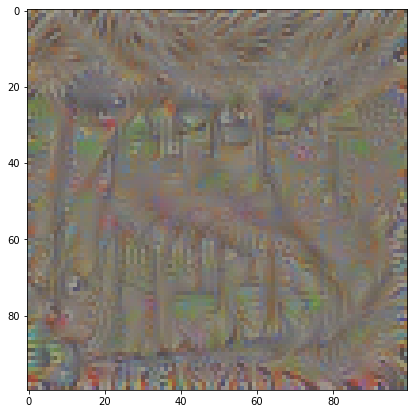

Iteration: 81 Loss: -59.67
Iteration: 82 Loss: -60.23
Iteration: 83 Loss: -60.80
Iteration: 84 Loss: -61.35
Iteration: 85 Loss: -61.90
Iteration: 86 Loss: -62.46
Iteration: 87 Loss: -63.02
Iteration: 88 Loss: -63.57
Iteration: 89 Loss: -64.12
Iteration: 90 Loss: -64.67
Iteration: 91 Loss: -65.22
Iteration: 92 Loss: -65.75
Iteration: 93 Loss: -66.30
Iteration: 94 Loss: -66.84
Iteration: 95 Loss: -67.39
Iteration: 96 Loss: -67.93
Iteration: 97 Loss: -68.48
Iteration: 98 Loss: -69.00
Iteration: 99 Loss: -69.53


In [0]:
class CNNLayerVisualization():
    """
        Produces an image that minimizes the loss of a convolution
        operation for a specific layer and filter
    """
    def __init__(self, model, selected_layer, selected_filter):
        self.model = model
        self.model.eval()
        self.selected_layer = selected_layer
        self.selected_filter = selected_filter
        self.conv_output = 0
        # Create the folder to export images if not exists
        

    def hook_layer(self):
        def hook_function(module, grad_in, grad_out):
            # Gets the conv output of the selected filter (from selected layer)
            self.conv_output = grad_out[0, self.selected_filter]
        # Hook the selected layer
        self.model[self.selected_layer].register_forward_hook(hook_function)

    def visualise_layer_with_hooks(self):
        sz = 100
        
        # Hook the selected layer
        self.hook_layer()
        # Generate a random image
        random_image = np.uint8(np.random.uniform(150, 180, (sz, sz, 3)))
        # Process image and return variable
        processed_image = preprocess_image(random_image, False)
        # Define optimizer for the image
        optimizer = Adam([processed_image], lr=0.01, weight_decay=1e-6)

        for _ in range(1):
          for i in range(1, 100):
            optimizer.zero_grad()
            x = processed_image
            for index, layer in enumerate(self.model):
                
                x = layer(x)
                if index == self.selected_layer:
                    break
            loss = -torch.mean(self.conv_output)
            print('Iteration:', str(i), 'Loss:', "{0:.2f}".format(loss.data.numpy()))
            loss.backward()
            optimizer.step()
            self.created_image = recreate_image(processed_image)

            if i % 20 == 0:
                im_path = '/content/' + str(self.selected_layer) + \
                    '_f' + str(self.selected_filter) + '_iter' + str(i) + '.jpg'
                save_image(self.created_image, im_path)
                fig, ax = plt.subplots(figsize=(7,7))
                ax.imshow(self.created_image) 
                plt.show()

          sz = int(1.2 * sz)  # calculate new image size
          self.created_image = cv2.resize(self.created_image, (sz, sz), interpolation = cv2.INTER_CUBIC)  # scale image up
          self.created_image  = cv2.blur(self.created_image ,(5,5), 0)



if __name__ == '__main__':
    cnn_layer = 26
    filter_pos = 127
    # Fully connected layer is not needed
    pretrained_model = models.vgg16(pretrained=True).features
    layer_vis = CNNLayerVisualization(pretrained_model, cnn_layer, filter_pos)

    # Layer visualization with pytorch hooks
    layer_vis.visualise_layer_with_hooks()

    # Layer visualization without pytorch hooks
    # layer_vis.visualise_layer_without_hooks()